
Import the data and show the first five rows.


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
data = sns.load_dataset('titanic')
data.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True



The number of the rows and the columns in the data. I try three ways for doing that.


In [7]:
data.shape

(891, 15)


Calculate the missing values from the columns. The first code was not sufficient, so I try one better with the sum.


In [10]:
print(data.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64



The number of passangers that survived. First I try to calculate the number of people that embarked in the cruise minus the survivals, but it didn`t work because of the data available in the `Embarked` column.
So I look to data values, and the column `Survived` returns the values 0 = no and 1 = yes, so I will use that information.


O e 1 with the correspondent names

In [24]:
survival_counts = data['survived'].value_counts()

print(f"Did not survive: {survival_counts[0]}")
print(f"Survive: {survival_counts[1]}")

Did not survive: 549
Survive: 342


In [25]:
print(data.groupby('sex')['survived'].value_counts())

sex     survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64



The average age of the passangers. The first one I made wrong, and correct in the second.


In [29]:
print(data['age'].mean())

29.69911764705882


A simple plot

Text(0, 0.5, 'Numbers of passengers')

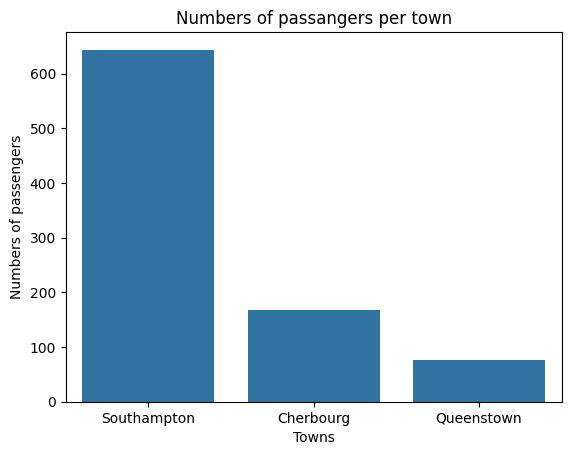

In [30]:
sns.countplot(data=data, x='embark_town')

plt.title("Numbers of passangers per town")
plt.xlabel("Towns")
plt.ylabel("Numbers of passengers")

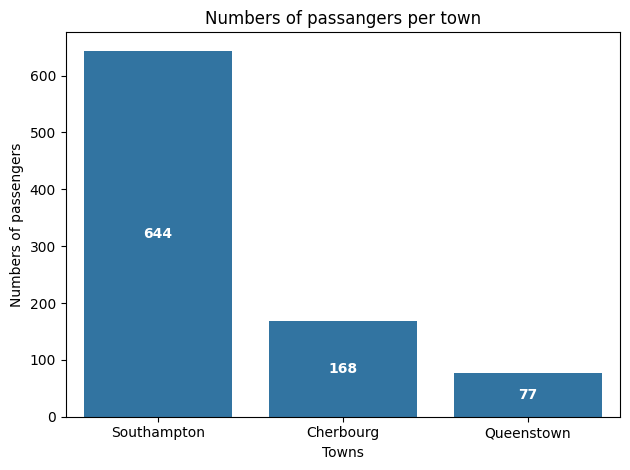

In [31]:
ax = sns.countplot(data=data, x='embark_town')

for bar in ax.patches:
    count = int(bar.get_height())
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height() / 2
    ax.annotate(
        f'{count}',
        xy=(x, y),
        ha='center',
        va='center',
        color='white',
        fontsize=10,
        fontweight='bold'
    )

plt.title("Numbers of passangers per town")
plt.xlabel("Towns")
plt.ylabel("Numbers of passengers")
plt.tight_layout()
plt.show()

Split the dataset, split one piece to train (70%) and one pice to test the train that as made before (30%)